<a href="https://colab.research.google.com/github/rahul0425/Driver-Drowsiness-Detection/blob/main/Driver_Drowsiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from google.colab import files
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
data=files.upload()

Saving data_file.zip to data_file.zip


In [ ]:
!unzip data_file.zip

Archive:  data_file.zip
   creating: data_file/
   creating: data_file/awake/
  inflating: data_file/awake/1.jpg   
  inflating: data_file/awake/1003.jpg  
  inflating: data_file/awake/1004.jpg  
  inflating: data_file/awake/1006.jpg  
  inflating: data_file/awake/1007.jpg  
  inflating: data_file/awake/1008.jpg  
  inflating: data_file/awake/1009.jpg  
  inflating: data_file/awake/1010.jpg  
  inflating: data_file/awake/1021.jpg  
  inflating: data_file/awake/1028.jpg  
  inflating: data_file/awake/1029.jpg  
  inflating: data_file/awake/1030.jpg  
  inflating: data_file/awake/1031.jpg  
  inflating: data_file/awake/1032.jpg  
  inflating: data_file/awake/1033.jpg  
  inflating: data_file/awake/1034.jpg  
  inflating: data_file/awake/1038.jpg  
  inflating: data_file/awake/1039.jpg  
  inflating: data_file/awake/1042.jpg  
  inflating: data_file/awake/1044.jpg  
  inflating: data_file/awake/1046.jpg  
  inflating: data_file/awake/1047.jpg  
  inflating: data_file/awake/1050.jpg  
  in

In [ ]:
dataset='data_file'

train_data=ImageDataGenerator(validation_split=0.2,rescale=1./255)
train=train_data.flow_from_directory(dataset,target_size=(70,70),
                                     batch_size=16,
                                     color_mode='rgb',
                                     class_mode='binary',
                                     seed=2020,subset='training')

test=train_data.flow_from_directory(dataset,target_size=(70,70),
                                     batch_size=16,
                                     color_mode='rgb',
                                     class_mode='binary',
                                     subset='validation')

img,labels=next(train)

Found 1827 images belonging to 2 classes.
Found 456 images belonging to 2 classes.


In [ ]:
def get_model():
  model=models.Sequential()
  
  model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=[70,70,3],padding='same'))
  model.add(layers.MaxPool2D(pool_size=(2,2),strides=2))
  model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
  model.add(layers.MaxPool2D(pool_size=(2,2),strides=2))

  model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
  model.add(layers.MaxPool2D(pool_size=(2,2),strides=2))

  model.add(layers.Flatten())

  model.add(layers.Dense(128,activation='relu'))
  model.add(layers.Dense(1,activation='sigmoid'))

  model.summary()

  return model  

In [ ]:
classifier=get_model()
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

history=classifier.fit(train, epochs=20, validation_data=test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
up=files.upload()

Saving 526.jpg to 526.jpg


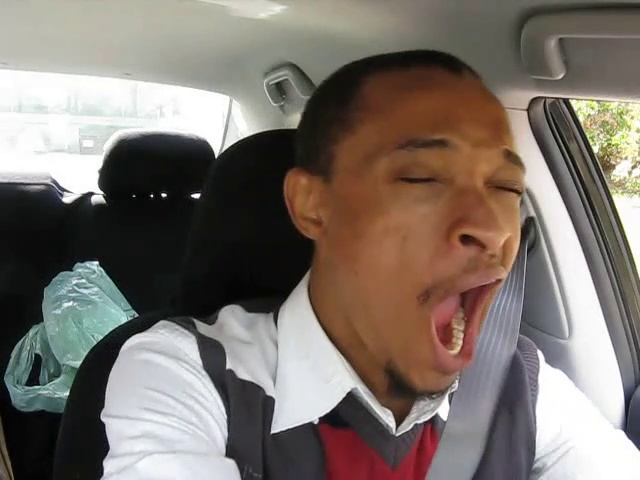

fine


In [ ]:
from IPython.display import Image,display
from keras.preprocessing import image
import numpy as np
img='526.jpg'
img_pred=image.load_img(img,target_size=(70,70))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

prediction=classifier.predict(img_pred)
display(Image(img,width=150,height=150))
if(int(prediction[0][0]==0)):
  print('fine')
else:
  print('alert')